# Importing the neccesay libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Read Datasets

In [2]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data cleaning and preparation

In [5]:
#add flags to track fake and real
data_fake["class"]=0
data_true["class"]=1

In [6]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [7]:
#droping rows
data_fake_manual_testing=data_fake.tail(10)
for i in range (23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
    
    
data_true_manual_testing=data_true.tail(10)
for i in range (21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [8]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\sushmitha\AppData\Local\Temp\ipykernel_39552\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\sushmitha\AppData\Local\Temp\ipykernel_39552\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [10]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
#concatenating dataframes and shuffling

data_merge=pd.concat([data_fake,data_true],axis=0)

from sklearn.utils import shuffle
data_merge=shuffle(data_merge)
data_merge.head(10)

,title,text,subject,date,class
14795,"Zimbabwe soldiers, armored vehicles seal road ...",HARARE (Reuters) - Zimbabwean soldiers and arm...,worldnews,"November 15, 2017",1
13220,BOOM! Poll Shows Support For Trump With Blacks...,Pandering Hillary just took a YUGE hit!Republi...,politics,"Aug 18, 2016",0
2026,"Trump calls Egypt's Sisi, says keen to overcom...",CAIRO (Reuters) - U.S. President Donald Trump ...,politicsNews,"August 25, 2017",1
3571,WATCH: Mike Pence Is Taken To The Woodshed By...,George Stephanopoulos refused to take shit fro...,News,"December 4, 2016",0
10558,PRICELESS! SEN CHUCK SCHUMER’S Childish Stunt ...,This is hysterical! Senator Chuck Schumer can ...,politics,"Jun 22, 2017",0
18449,DEBBIE WASSERMAN SCHULTZ Accuses Obama’s DHS D...,Rep. Debbie Wasserman Schultz dropped a big bo...,left-news,"Jun 22, 2017",0
3257,Puerto Rico votes in favor of U.S. statehood a...,SAN JUAN (Reuters) - The economically struggli...,politicsNews,"June 11, 2017",1
21154,[VIDEO] DINESH D’SOUZA Warned Us About What Th...,Dinesh made some frightening predictions in hi...,left-news,"Jan 7, 2016",0
987,Public Schools In Kentucky Can Now “Teach” Th...,The Republicans are at it again this time by...,News,"June 28, 2017",0
1321,Trump says he's likely to sign healthcare orde...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"October 10, 2017",1


# Basic data exploration

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


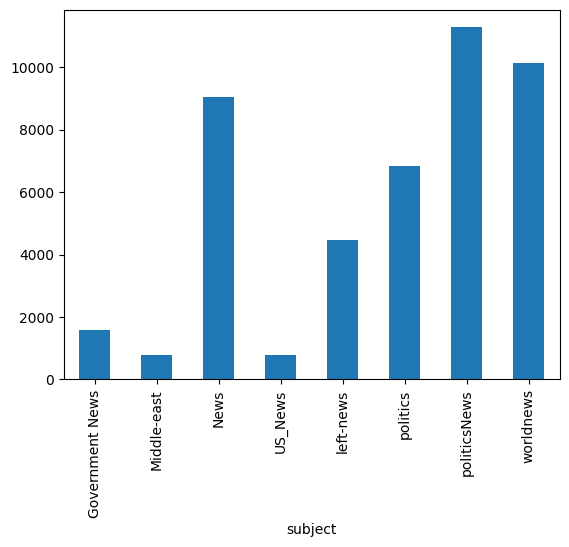

In [13]:
#how many articles of each subject are present

print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()


class
0    23471
1    21407
Name: text, dtype: int64


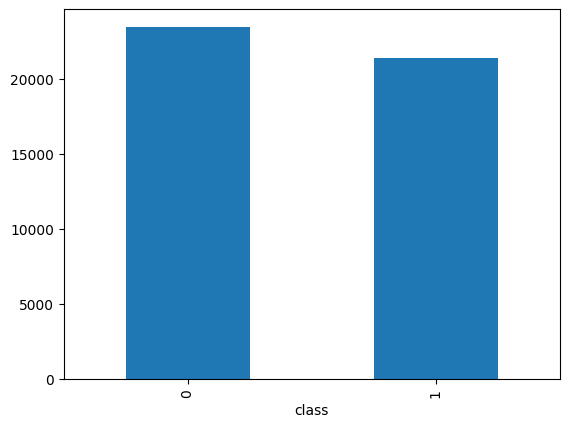

In [14]:
#how many fake and real articles are there?

print(data_merge.groupby(['class'])['text'].count())
data_merge.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()


In [15]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
#droping columns
data=data_merge.drop(['title','subject', 'date',],axis=1)

In [17]:
#checking for null values (if any)

data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
data=data.sample(frac=1)

In [19]:
data.head()

,text,class
13833,BARCELONA (Reuters) - Pro-independence parties...,1
690,"Richard Painter, former ethics lawyer to Presi...",0
13664,"JAKARTA/CANDI DASA, Indonesia (Reuters) - Bali...",1
9398,President Trump on Saturday criticized Hillary...,0
438,(Reuters) - The following are five facts about...,1


In [20]:
#resetign and droping index

data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [21]:
data.columns

Index(['text', 'class'], dtype='object')

In [22]:
data.head()

,text,class
0,BARCELONA (Reuters) - Pro-independence parties...,1
1,"Richard Painter, former ethics lawyer to Presi...",0
2,"JAKARTA/CANDI DASA, Indonesia (Reuters) - Bali...",1
3,President Trump on Saturday criticized Hillary...,0
4,(Reuters) - The following are five facts about...,1


In [23]:
# Function to remove punctuation and special characters
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','', text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*', '',text)
    return text

In [24]:
data['text']=data['text'].apply(wordopt)

# Data Modelling


In [25]:
x=data['text']
y=data['class']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
#fitting the model
LR.fit(xv_train, y_train)

LogisticRegression()

In [29]:
#accuracy
pred_lr=LR.predict(xv_test)

In [30]:
LR.score(xv_test,y_test)

0.9872549019607844

In [31]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5956
           1       0.99      0.99      0.99      5264

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree


In [32]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt=DT.predict(xv_test)

In [34]:
DT.score(xv_test, y_test)

0.9951871657754011

In [35]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5956
           1       1.00      0.99      0.99      5264

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boost


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb=GB.predict(xv_test)

In [38]:
GB.score(xv_test, y_test)

0.9958110516934047

In [39]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5956
           1       0.99      1.00      1.00      5264

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rf=RF.predict(xv_test)

In [42]:
RF.score(xv_test,y_test)

0.9914438502673797

In [43]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5956
           1       0.99      0.99      0.99      5264

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [44]:
def output_label(n):
    if n==0:
        return ":  Fake News! The given news is Fake"
    elif n==1:
        return ":  Not a Fake News! The given news is indeed True"


def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    pred_DT=DT.predict(new_xv_test)
    pred_GB=GB.predict(new_xv_test)
    pred_RF=RF.predict(new_xv_test)
    return print("\n\n LR Prediction:{} \n DT Prediction:{} \n GBC Prediction:{} \n RFC Prediction:{}".format(output_label(pred_LR[0]),output_label(pred_DT[0]),output_label(pred_GB[0]),output_label(pred_RF[0])))
    

In [ ]:
#user input
news=str(input())
manual_testing(news)